
# **Credit Card Fraud Detection**

### **Objectives:**
1. Develop a machine learning model to detect fraudulent credit card transactions.
2. Preprocess and normalize the transaction data to ensure it is suitable for modeling.
3. Address class imbalance issues in the dataset, as fraudulent transactions are typically rare compared to genuine ones.
4. Split the dataset into training and testing sets to evaluate the model's performance effectively.
5. Select a classification algorithm, such as logistic regression or random forests, for training the model.
6. Evaluate the model's performance using metrics like precision, recall, and F1-score to assess its effectiveness in detecting fraud.
7. Consider employing oversampling or undersampling techniques to improve the model's results, given the class imbalance problem.

**Importing the libraries needed**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


**Loading the dataset**

In [2]:
#Importing the dataset
df= pd.read_csv("C://Users\RICHA\Desktop\Credit card fraud detection\creditcard.csv")

**Exploring the data**

In [3]:
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**Getting the shape of the data**

In [4]:
df.shape

(284807, 31)

**Handling the missing values**

In [5]:
df.isna().sum().sort_values()

Time      0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
Amount    0
V15       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V1        0
V14       0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Defining the fraud**

In [7]:
#Defining  fraud and valid
f = df[df['Class'] == 1]
v = df[df['Class'] == 0]

#Print counts
print('There are {} fraudulent transactions'.format(f.shape[0]))
print('There are {} valid transcations'.format(v.shape[0]))

There are 492 fraudulent transactions
There are 284315 valid transcations


**Getting the information about the Fraudelent transactions**

In [8]:
#Descriptive statistics for fraudulent transactions.
f.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Getting the information about the Valid transactions**

In [9]:
#Descriptive statistics for valid transcations
v.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Visualizing the Mean Transaction Amount**

Text(0, 0.5, 'Mean Transcation Amount')

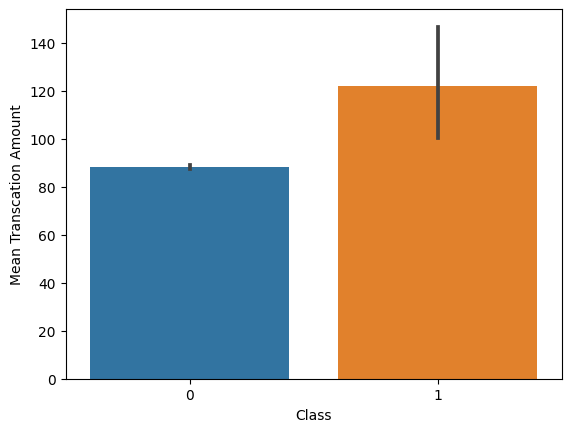

In [10]:
#Graph of amount
sns.barplot(data=df,x='Class', y='Amount')
plt.ylabel('Mean Transcation Amount')

In [11]:
n_replicas = 10

# inflate the original dataset
df = pd.DataFrame(np.repeat(df.values, n_replicas, axis=0), columns=df.columns)

print("There are " + str(len(df)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

# display first rows in the new dataset
print(df.head())

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
2   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
3   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
4   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
2  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
3  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   


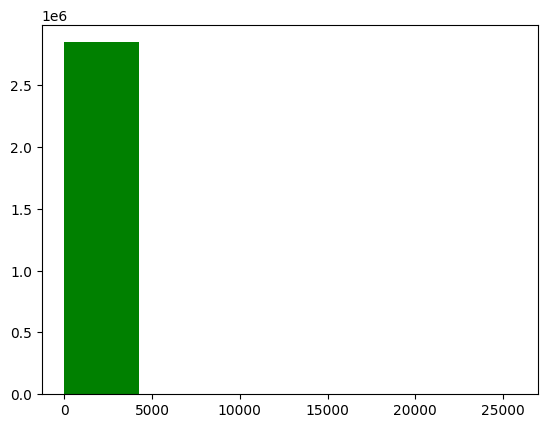

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [12]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(df.Amount.values))
print("Maximum amount value is ", np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

# **Data Preprocessing**

In [13]:
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

#Create the feature matrix 'X' by excluding the 'Time' variable from the dataset.
X = data_matrix[:, 1:30]

#Create the labels vector 'y' by selecting the values from the 31st column of the dataset.
y = data_matrix[:, 30]

#Normalize the feature matrix 'X' using L1 normalization, which scales each feature
#independently to have a sum of absolute values equal to 1
X = normalize(X, norm="l2")

#Print the shape of the feature matrix 'X' and the labels vector 'y' to verify their dimensions.
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


# **Splitting the dataset**

In [14]:
#splitting the dataset and train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


**Plotting the correlation matrix**

<Axes: >

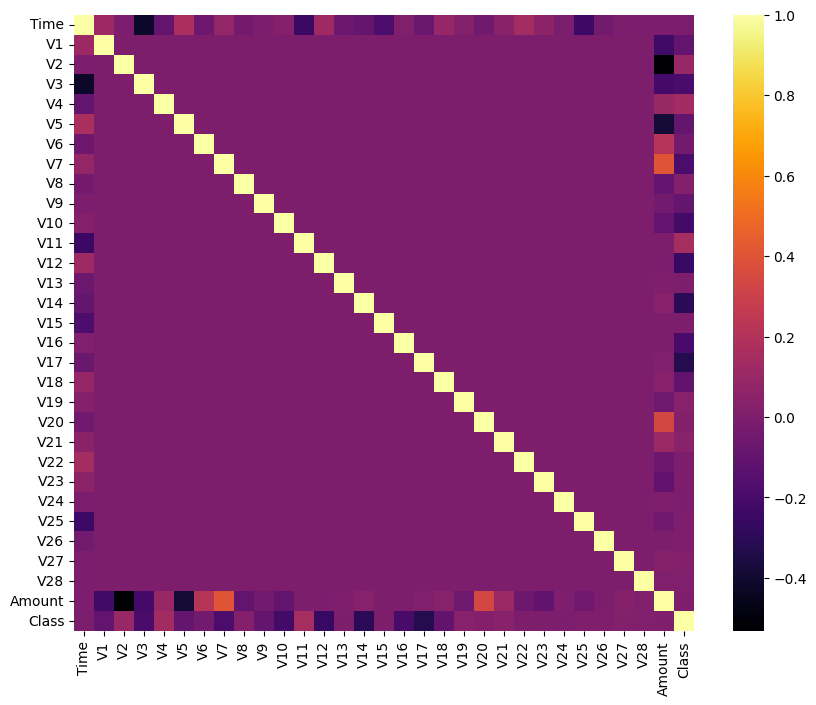

In [15]:
#Correlation Matrix
corr = df.corr()
fig = plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap='inferno')

# **Buliding the Model**

In [16]:
#Create Model Dictionary
models ={
         'LogReg': LogisticRegression(),
         'rforest': RandomForestClassifier()
}
#Name and Score list
names=[]
scores=[]
#Loop over name and model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    names.append(name)
    scores.append(score)

In [17]:
#Create a DataFrame to Compare Scores
results = pd.DataFrame({'model': names, 'score': scores})
#Sort Results
results.sort_values(by='score', ascending=False)

,model,score
1,rforest,1.000000
0,LogReg,0.999382


**Define the Random Forest as it perfomrs best**

In [18]:
#Define
rforest = RandomForestClassifier()
#Fit model
rforest.fit(X_train,y_train)
#predict
y_pred = rforest.predict(X_test)
#score
score = accuracy_score(y_pred, y_test)
#print
print(score)

1.0


In [19]:
#Create report
report=classification_report(y_test,y_pred)
#Print report
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    852945
         1.0       1.00      1.00      1.00      1476

    accuracy                           1.00    854421
   macro avg       1.00      1.00      1.00    854421
weighted avg       1.00      1.00      1.00    854421



# **Performing undersampling/oversampling**
Undersampling and oversampling are techniques to tackle class imbalance in machine learning, specifically in binary classification tasks where one class is much more prevalent than the other. They aim to enhance model performance by adjusting the class distribution in the dataset.

In [20]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Now we have a Random Forest supervised classification model to predict credit card fraud.

In [21]:
# Apply Random Under-Sampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Apply Random Over-Sampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [22]:
# Train a Random Forest Classifier on the resampled data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[852945      0]
 [     0   1476]]
